<a href="https://colab.research.google.com/github/MaximeGautrot/CV_Tirana/blob/main/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

<ipython-input-5-244b0e04484d>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
<ipython-input-5-244b0e04484d>:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


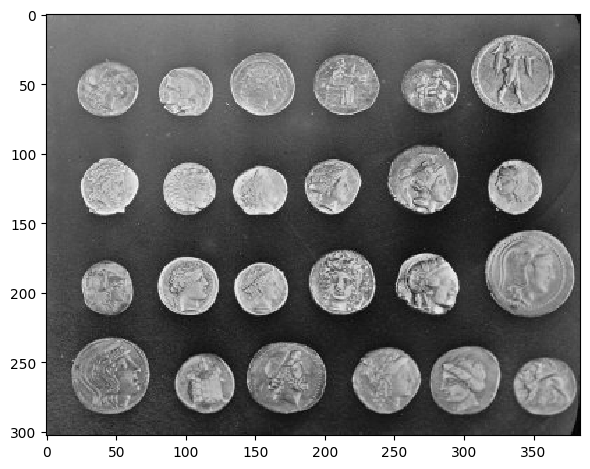

N = 303 rows, M = 384 columns
Range of grayscale: Min = 1, Max = 252


In [5]:
import skimage as sk # load skimage libraries
IC = sk.data.coins() # load a color image from the skimage built-in dataset
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()
min_grayscale = IC.min()
max_grayscale = IC.max()
print('N = {} rows, M = {} columns'.format(*IC.shape)) # Print out image size
print('Range of grayscale: Min = {}, Max = {}'.format(min_grayscale, max_grayscale))

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

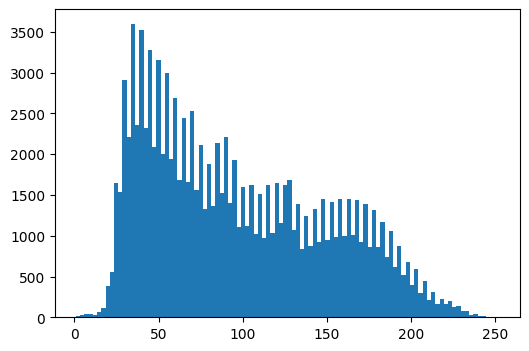

In [7]:
import matplotlib.pyplot as plt
import skimage as sk

IC = sk.data.coins()

flat_data = IC.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

The first part represents the background of the photo. The second one, in the middle range, represents the coins themself because they are grey. Finally, the high values in the last part is for the shine that there is on some coins wich have more light on them.

## 3. Applied noise to the image and use the correct function to erase the noise.

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


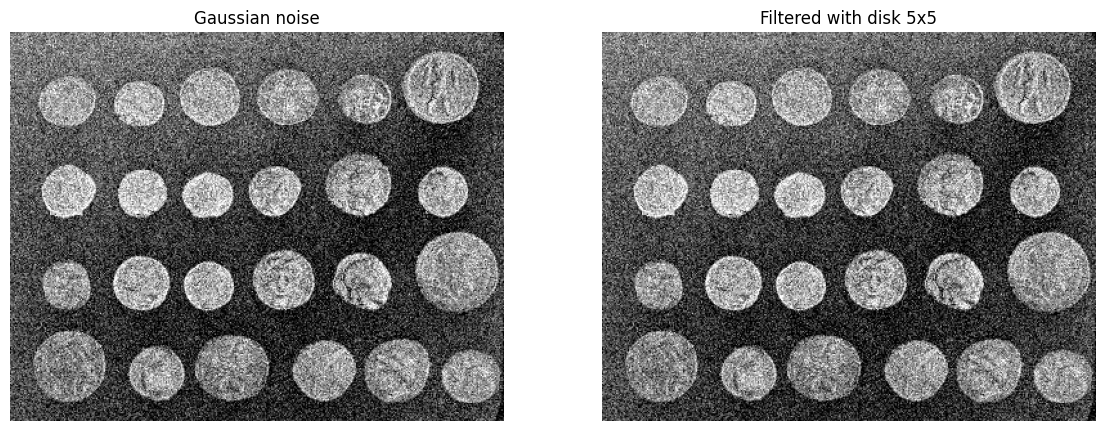

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
from skimage.morphology import disk

from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.filters.rank import mean_bilateral
from skimage.filters import rank

def plot_comparison(filtered, filter_name, filtered_2, filter_name_2):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(filtered, cmap=plt.cm.gray)
    ax1.set_title(filter_name)
    ax1.axis('off')
    ax2.imshow(filtered_2, cmap=plt.cm.gray)
    ax2.set_title(filter_name_2)
    ax2.axis('off')


img = img_as_float(data.coins())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

selem = disk(5) # structuring element

# Apply the mean_bilateral filter.
img_locmed = mean_bilateral(noisy_image_normal, disk(3), s0=5, s1=5)

plot_comparison(noisy_image_normal, "Gaussian noise", img_locmed,'Filtered with disk 5x5')


## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

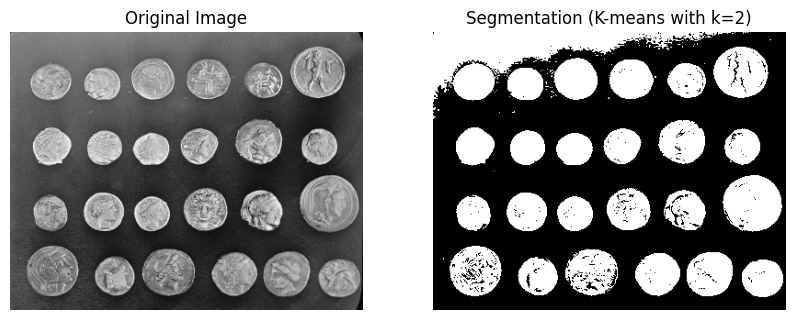

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

v_I = IC.reshape(-1, 1)

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(IC.shape[0],IC.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

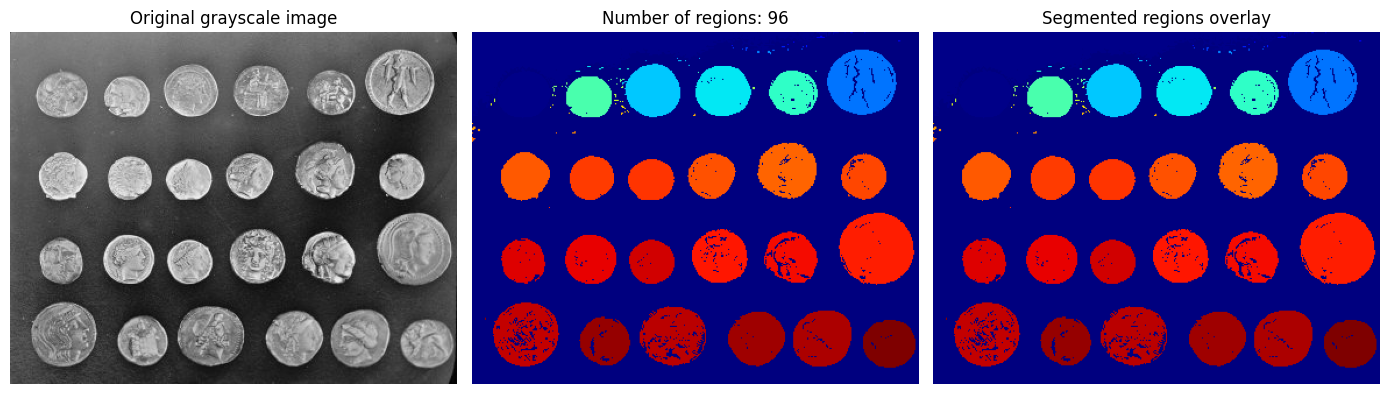

In [32]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IC)
bw = IC > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(label_image,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

The algorithm says that there is 96 regions.

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

In [38]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.mean()


,0
label,48.500000
area,469.968750
eccentricity,0.449723
extent,0.863164
axis_major_length,15.758364


<Axes: xlabel='axis_major_length', ylabel='area'>

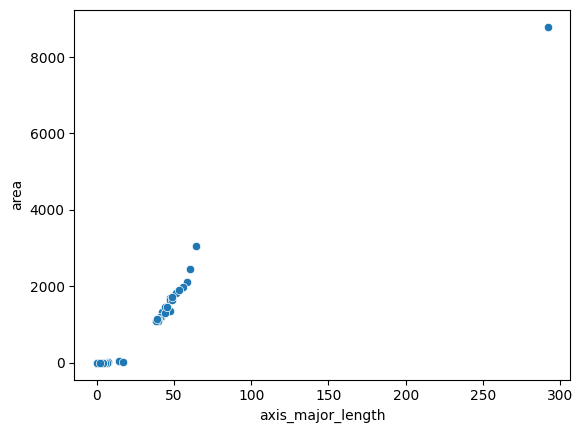

In [39]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [49]:
minimum_area = 1750

df_large_coins = df_features.loc[df_features['area']>=minimum_area]
N_large = df_large_coins.shape[0]
print('There are {} coins with an area larger or equal the area {}'.format(N_large,minimum_area))

There are 7 coins with an area larger or equal the area 1750


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

There are 89 coins with an area smaller than the min area 1750
Labels of small coins: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 78 79 80 81 82 83 85 86 87 88 89 93 94 95 96]
Labels of large coins: [ 1 23 77 84 90 91 92]


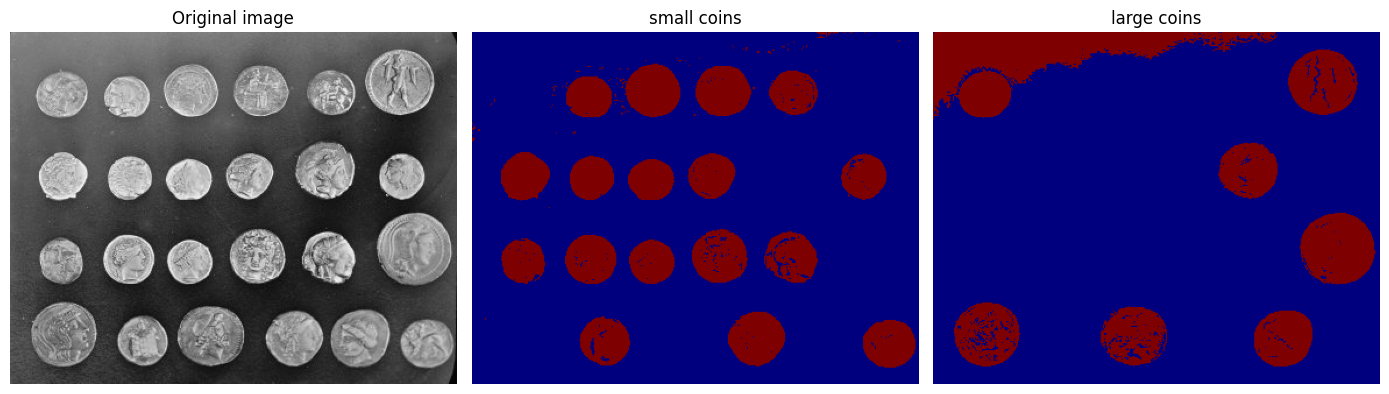

In [51]:
df_small_coins = df_features.loc[df_features['area']<minimum_area]
N_small = df_small_coins.shape[0]
print('There are {} coins with an area smaller than the min area {}'.format(N_small,minimum_area))

labels_small = df_small_coins['label'].values
print('Labels of small coins: {}'.format(labels_small))
labels_large = df_large_coins['label'].values
print('Labels of large coins: {}'.format(labels_large))

mask_small_coins = np.isin(label_image,labels_small)
mask_large_coins = np.isin(label_image,labels_large)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_coins,cmap=plt.cm.jet)
ax[1].set_title('small coins') # set figure title
ax[2].imshow(mask_large_coins,cmap=plt.cm.jet)
ax[2].set_title('large coins')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

1. We upload the RGB image (in our case, it's not a RGB one because we want to compare with the image coins).

2. We reshape the image

3. We fit the Gaussian Mixture Model

4. We predict the GMM cluster for each pixel

5. We reshape the clustering output with the original image size

6. We display the two differents images to get the differences

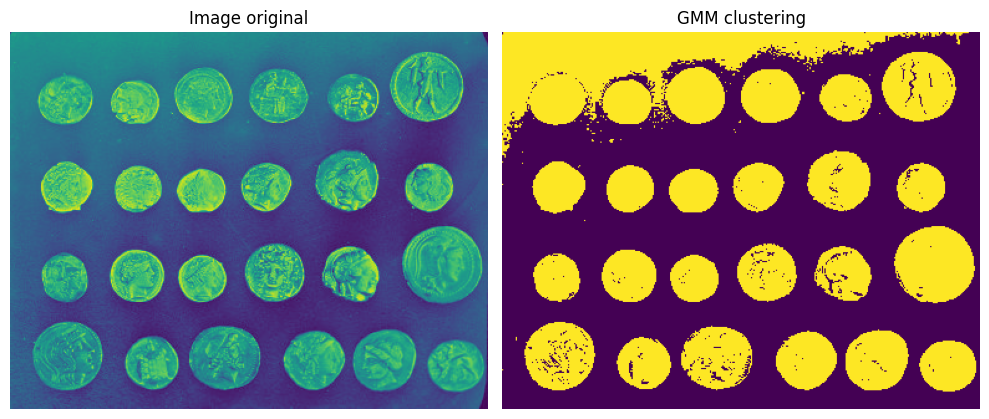

There are 96 differents region


In [75]:
import skimage as sk
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

I = sk.data.coins() # load RGM image
v_I = I.reshape(-1, 1)

gmm = mixture.GaussianMixture(n_components=2).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Image original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

# found on internet to get the number of different regions
centers = gmm.means_.flatten()
coin_label = np.argmax(centers)
mask = (I_gmm == coin_label)
labeled = measure.label(mask)
print("There are {} differents region".format(labeled.max()))

We have the impression that there isn't a significant difference between K-Means and GMM in our case. When we look at the two resulting images, they appear quite similar. Additionally, when we compare them by counting the number of different regions, we obtain the same result. (I'm not completely sure about the GMM part — I found how to get the number of regions by searching online.)


## 10. Extract the main texture features of this image

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

# Suponiendo que tienes:
# - `IG`: imagen en escala de grises normalizada (float o uint8)
# - `label_image`: imagen segmentada (mismo tamaño que IC)

props = regionprops(label_image, intensity_image=IC)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IC[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calcular GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extraer características
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

# Exportar a Excel
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,487.871528,15.732639,0.092837,0.045072,0.951919
1,239.205476,6.942702,0.339748,0.106714,0.978941
2,1114.721429,26.164286,0.035906,0.060398,0.796315
3,1008.164286,18.478571,0.144967,0.078246,0.846223
4,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
150,1314.944444,27.500000,0.059873,0.171234,0.254198
151,433.000000,17.000000,0.019825,0.500000,0.219116
152,0.000000,0.000000,0.000000,0.000000,1.000000
153,0.000000,0.000000,0.000000,0.000000,1.000000


## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

The class was a bit difficult for me because it was my first time taking a major course in AI. However, even though it was challenging, I found that you explained the concepts very clearly, and I really appreciated the passion you put into your lectures. I learned a lot, and I also enjoyed discovering your work as a researcher, which I found very interesting.

Thank you so much!
